In [60]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

import warnings
warnings.filterwarnings('ignore')

Data Preparation



In [100]:
Moviedata = pd.read_csv('AfterEDA-Cleaning.csv')
Moviedata.head()

,Unnamed: 0,ID,Title,Decade,Age of Movie,Age Category,IMDb,Rotten,Availability,Genres,Country,Language,Runtime
0,0,1,The Matrix,1990s,23,18+,8.7,87,1,Action,United States,English,136
1,1,2,Back to the Future,1980s,37,7+,8.5,96,1,Adventure,United States,English,116
2,2,3,Spider-Man: Into the Spider-Verse,2010s,4,7+,8.4,97,1,Animation,United States,English,117
3,3,4,Raiders of the Lost Ark,1980s,41,7+,8.4,95,1,Action,United States,English,115
4,4,5,Taxi Driver,1970s,46,18+,8.3,95,1,Crime,United States,English,114


Summary Statistics for Age Category in General

In [101]:
X = Moviedata[['Rotten','Runtime', 'Age of Movie', 'Age Category', 'Genres', 'Country', 'Language']]
Y = Moviedata['IMDb']

X = pd.get_dummies(data=X, drop_first=True)

In [106]:
X.head()

,Rotten,Runtime,Age of Movie,Age Category_16+,Age Category_18+,Age Category_7+,Age Category_all,Genres_Adventure,Genres_Animation,Genres_Biography,...,Language_Polish,Language_Portuguese,Language_Punjabi,Language_Russian,Language_Spanish,Language_Tamil,Language_Telugu,Language_Vietnamese,Language_Wolof,Language_Yiddish
0,87,136,23,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,96,116,37,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,97,117,4,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,95,115,41,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,95,114,46,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4061, 133)
(1016, 133)
(4061,)
(1016,)


In [108]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [109]:
# print the intercept
print(model.intercept_)

1.4748309347085202


In [110]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Rotten,0.022466
Runtime,0.015368
Age of Movie,0.010997
Age Category_16+,-0.285266
Age Category_18+,-0.090659
...,...
Language_Tamil,3.678907
Language_Telugu,2.721052
Language_Vietnamese,2.080697
Language_Wolof,0.906958


In [111]:
predictions = model.predict(X_test)
predictions

array([5.5608179 , 5.55720609, 6.68022607, ..., 6.08323583, 5.79779886,
       5.91740154])

<AxesSubplot:xlabel='IMDb'>

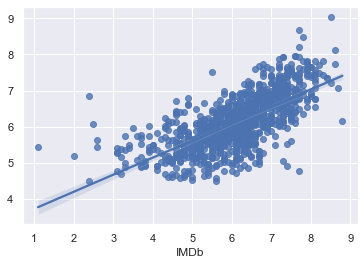

In [112]:
sb.regplot(y_test,predictions)

In [113]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)

X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                   IMDb   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     28.55
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:36:39   Log-Likelihood:                -4657.3
No. Observations:                4061   AIC:                             9571.
Df Residuals:                    3933   BIC:                         1.038e+04
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [114]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 133)

In [101]:
X = Moviedata[['Rotten','Runtime', 'Age of Movie', 'Age Category', 'Genres', 'Country', 'Language']]
Y = Moviedata['IMDb']

X = pd.get_dummies(data=X, drop_first=True)

In [106]:
X.head()

,Rotten,Runtime,Age of Movie,Age Category_16+,Age Category_18+,Age Category_7+,Age Category_all,Genres_Adventure,Genres_Animation,Genres_Biography,...,Language_Polish,Language_Portuguese,Language_Punjabi,Language_Russian,Language_Spanish,Language_Tamil,Language_Telugu,Language_Vietnamese,Language_Wolof,Language_Yiddish
0,87,136,23,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,96,116,37,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,97,117,4,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,95,115,41,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,95,114,46,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4061, 133)
(1016, 133)
(4061,)
(1016,)


In [108]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [109]:
# print the intercept
print(model.intercept_)

1.4748309347085202


In [110]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Rotten,0.022466
Runtime,0.015368
Age of Movie,0.010997
Age Category_16+,-0.285266
Age Category_18+,-0.090659
...,...
Language_Tamil,3.678907
Language_Telugu,2.721052
Language_Vietnamese,2.080697
Language_Wolof,0.906958


In [111]:
predictions = model.predict(X_test)
predictions

array([5.5608179 , 5.55720609, 6.68022607, ..., 6.08323583, 5.79779886,
       5.91740154])

<AxesSubplot:xlabel='IMDb'>

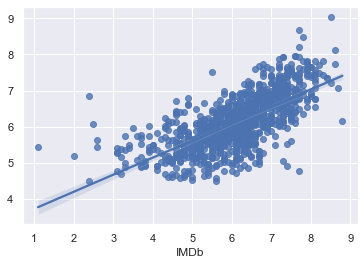

In [112]:
sb.regplot(y_test,predictions)

In [113]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)

X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                   IMDb   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     28.55
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:36:39   Log-Likelihood:                -4657.3
No. Observations:                4061   AIC:                             9571.
Df Residuals:                    3933   BIC:                         1.038e+04
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [114]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 133)

In [101]:
X = Moviedata[['Rotten','Runtime', 'Age of Movie', 'Age Category', 'Genres', 'Country', 'Language']]
Y = Moviedata['IMDb']

X = pd.get_dummies(data=X, drop_first=True)

In [106]:
X.head()

,Rotten,Runtime,Age of Movie,Age Category_16+,Age Category_18+,Age Category_7+,Age Category_all,Genres_Adventure,Genres_Animation,Genres_Biography,...,Language_Polish,Language_Portuguese,Language_Punjabi,Language_Russian,Language_Spanish,Language_Tamil,Language_Telugu,Language_Vietnamese,Language_Wolof,Language_Yiddish
0,87,136,23,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,96,116,37,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,97,117,4,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,95,115,41,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,95,114,46,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4061, 133)
(1016, 133)
(4061,)
(1016,)


In [108]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [109]:
# print the intercept
print(model.intercept_)

1.4748309347085202


In [110]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Rotten,0.022466
Runtime,0.015368
Age of Movie,0.010997
Age Category_16+,-0.285266
Age Category_18+,-0.090659
...,...
Language_Tamil,3.678907
Language_Telugu,2.721052
Language_Vietnamese,2.080697
Language_Wolof,0.906958


In [111]:
predictions = model.predict(X_test)
predictions

array([5.5608179 , 5.55720609, 6.68022607, ..., 6.08323583, 5.79779886,
       5.91740154])

<AxesSubplot:xlabel='IMDb'>

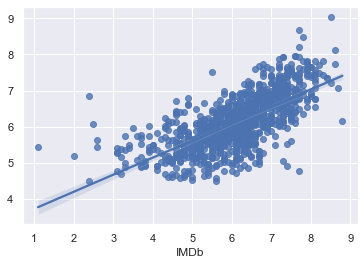

In [112]:
sb.regplot(y_test,predictions)

In [113]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)

X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                   IMDb   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     28.55
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:36:39   Log-Likelihood:                -4657.3
No. Observations:                4061   AIC:                             9571.
Df Residuals:                    3933   BIC:                         1.038e+04
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [114]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 133)